## Introduction - Final Project - Identify Consumer Profiles of E-Commerce


Everything Plus is an online retailer that sells a wide variety of household goods with the goal of "eliminating drabness and distributing coziness to every corner of the galaxy". As part of their growth strategy, Everything Plus is looking to better understand and categorize their customer base through identification of consumer profiles.

By segmenting customers into distinct profiles based on purchase history and behaviors, Everything Plus aims to provide more personalized recommendations, targeted promotions, and an overall improved shopping experience. The key objectives are to analyze transaction data to group customers into homogeneous segments, characterize each segment based on product affinity and purchase patterns, and identify opportunities to tailor marketing for each profile.

This project will focus on exploratory data analysis of Everything Plus's transaction history to extract insights about their customers. Through application of clustering algorithms and statistical testing, we will identify distinct consumer profiles based on purchase behaviors. In addition to guiding more personalized e-commerce experiences, the consumer profiles may reveal potential new products to offer or markets to enter that align with demand.

Based on the details provided in the project brief, here is an overview of what we want to achieve and why:

The key thing we want to achieve is to identify distinct consumer profiles by segmenting Everything Plus customers based on their transaction history and purchase behaviors. 

The reasons this segmentation analysis is valuable:

- It will allow Everything Plus to better understand their customer base and what motivates different types of shoppers. Identifying unique consumer profiles provides more insight into customer needs.

- It enables more personalized marketing and products. Everything Plus can tailor promotions, recommendations, and overall shopping experience to align with the preferences of each segment.

- It reveals opportunities for new products or markets. The profiles may uncover underserved demand for certain types of products among shopper segments.

- It supports targeted growth strategies. Focusing marketing efforts on their most valuable customer segments can improve conversions and lifetime value.

- It provides data to inform business decisions. The profiles give measurable insights into customer behavior that can guide strategy across departments.

Overall, the goal is to leverage transaction data to group similar shoppers, understand what makes each segment unique, and enable Everything Plus to interact with customers in a more personalized way to drive growth. Let me know if you need any clarification or have additional goals to consider.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

## Read Data

In [2]:
data = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


Here's a breakdown of the columns:

- `InvoiceNo`: Contains 541,909 non-null values, and its data type is object.
- `StockCode`: Contains 541,909 non-null values, and its data type is object.
- `Description`: Contains 540,455 non-null values, and its data type is object. It has some missing values (541,909 - 540,455 = 1,454 missing values).
- `Quantity`: Contains 541,909 non-null values, and its data type is int64.
- `InvoiceDate`: Contains 541,909 non-null values, and its data type is object.
- `UnitPrice`: Contains 541,909 non-null values, and its data type is float64.
- `CustomerID`: Contains 406,829 non-null values, and its data type is float64. It has some missing values (541,909 - 406,829 = 135,080 missing values).

## Data Exploration

### Check sample data

Lets display randomly the data

In [4]:
# Randomly sample 5 rows from the DataFrame with replacement
data.sample(n=5, replace=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
358988,568169,22398,MAGNETS PACK OF 4 SWALLOWS,12,09/23/2019 12:54,0.39,14152.0
141268,548505,20655,QUEEN OF SKIES LUGGAGE TAG,1,03/29/2019 14:34,2.46,NaN
179548,552281,21380,WOODEN HAPPY BIRTHDAY GARLAND,12,05/06/2019 12:42,2.95,15704.0
195449,553718,22951,60 CAKE CASES DOLLY GIRL DESIGN,1,05/16/2019 16:14,1.25,NaN
160409,550458,84031A,CHARLIE+LOLA RED HOT WATER BOTTLE,1,04/16/2019 13:13,4.13,NaN


 We will change all the column names to lowercase in the DataFrame. This is to make the column all consistent. Converting column names to lowercase and renaming them is a common best practice in data preprocessing.
 
What is the Benefits of converting to lowercase and renaming columns include:
- Consistency: Ensures uniformity and reduces confusion in the DataFrame.
- Readability: Lowercase column names are visually cleaner and easier to distinguish.


### Convert and Rename Columns

In [5]:
# Convert all column names to lowercase
data.columns = data.columns.str.lower()

# Rename specific columns as per your requirements
data = data.rename(columns={
    'invoiceno': 'order_id',
    'stockcode': 'item_id',
    'description': 'item_name',
    'invoicedate': 'order_date',
    'unitprice': 'item_price',
    'customerid': 'customer_id'
})

# Display the DataFrame with the updated column names
display(data.head())

,order_id,item_id,item_name,quantity,order_date,item_price,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


We will check the basic statistical summary of the DataFrame, we will use the `describe()` function in pandas. This function will provide various statistics for numerical columns such as count, mean, standard deviation, minimum, quartiles, and maximum. 

### Check data statistically

In [6]:
# Display the statistical summary of the DataFrame
data.describe()

,quantity,item_price,customer_id
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


From the data exploration conducted, we can make several findings and observations:

1. Statistical Summary: The statistical summary provides insights into the numerical columns (quantity, item_price, and customer_id) of the DataFrame. We can observe the following statistics for each column:

    - quantity: The number of items ordered on average is around 9.55, with a minimum value of -80995 and a maximum value of 80995.
    - item_price: The average item price is approximately 4.61, with prices ranging from -11062.06 to 38970.00.
    - customer_id: There are 406,829 unique customer IDs, with an average customer ID of approximately 15287.69.
    
    
2. Outliers: The statistical summary indicates that there are some extreme values in the quantity and item_price columns. Negative quantities and unusually high item prices might be considered outliers and should be investigated further to ensure data quality.

3. Missing Values: The statistical summary also reveals that the customer_id column has missing values, as indicated by the difference between the count of total rows and the count of non-null values in that column (541,909 - 406,829 = 135,080 missing values). Handling these missing values appropriately might be necessary for this analysis.

4. Date Format: The order_date column contains dates in a specific format (MM/DD/YYYY HH:MM). It might be beneficial to convert this column to a datetime data type to perform time-based operations.

These findings provide valuable initial insights into the dataset, but further data exploration and analysis will be needed to gain a comprehensive understanding of the data, identify patterns, detect trends, and draw meaningful conclusions based on the specific use case and objectives.

### Check for duplicate values in the DataFrame

We explore and analyze a dataset containing transactional information from an e-commerce platform. The dataset includes details such as order_id, item_id, item_name, quantity, order_date, item_price, and customer_id.

To ensure consistency and improve readability, we convert all column names to lowercase and rename specific columns to more descriptive names, like order_id instead of InvoiceNo and item_id instead of StockCode.

Next, we check for duplicate rows in the data to identify identical entries. 

In [7]:
# Get the total number of duplicate rows in the DataFrame
total_duplicate_rows = data.duplicated().sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(data)

# Calculate the percentage of duplicate rows
percentage_duplicates = (total_duplicate_rows / total_rows) * 100

# Display the percentage of duplicate rows
print(f"Percentage of duplicate rows: {percentage_duplicates:.2f}%")

Percentage of duplicate rows: 0.97%


- Due to the percentage of duplicate rows is small and not expected to significantly affect the analysis, we will go ahead and drop the duplicate rows from the DataFrame. To do this, we use the `drop_duplicates()` method in pandas. 

- The `drop_duplicates()` method with `keep='first'` argument will keep the first occurrence of each duplicate row and remove the subsequent occurrences.

In [8]:
# Drop duplicate rows from the DataFrame
data = data.drop_duplicates(keep='first')

# Display the updated DataFrame without duplicate rows
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   order_id     536641 non-null  object 
 1   item_id      536641 non-null  object 
 2   item_name    535187 non-null  object 
 3   quantity     536641 non-null  int64  
 4   order_date   536641 non-null  object 
 5   item_price   536641 non-null  float64
 6   customer_id  401604 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 32.8+ MB


None

### Treat & Check missing values

Next, inspect missing values in the DataFrame, we use the `isnull()` method in pandas.

In [9]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display the count of missing values in each column
print(missing_values)

order_id            0
item_id             0
item_name        1454
quantity            0
order_date          0
item_price          0
customer_id    135037
dtype: int64


Observation based on the following regarding missing values in the DataFrame:

1. The column `item_name` has 1454 missing values, suggesting that some items lack a description in the dataset.

2. The column `customer_id` has 135,037 missing values, indicating that a significant number of transactions lack customer information.

Missing values can impact data analysis and must be handled carefully. We need to address these missing values through data imputation or make adjustments in our analysis to account for the missing data. Proper handling of missing values ensures the accuracy and reliability of our results.

#### Treat item_name missing values

- We code groups the data by `item_id`, counts the occurrences of `item_name` for each item, then filters out NaN values, and gets the most common item name for each `item_id`. 
- It creates a new DataFrame with the item counts and most common item names, merges it with the original data, and replaces the missing `item_name` values with the most common item names for their respective `item_id.` 
- Finally, it updates the original `data` DataFrame with the cleaned and imputed values for `item_name`.

In [10]:
# Group data by item_id and count the number of occurrences
item_counts = data.groupby('item_id')['item_name'].count()

# Filter out NaN values and get the most common item name for each item_id
most_common = data[data['item_name'].notna()].groupby('item_id')['item_name'].agg(lambda x: x.value_counts().index[0])

# Combine the item counts and most common item names into a new dataframe
items = pd.concat([item_counts, most_common], axis=1)

# Rename the columns in the new dataframe
items.columns = ['count', 'most_common']

# Reset the index to make the 'item_id' column a regular column
items = items.reset_index()

# Merge the 'most_common' item names back into the original data DataFrame
data = data.merge(items, on='item_id', how='left')

# Drop the original 'item_name' and 'count' columns, and rename 'most_common' to 'item_name'
data.drop(['item_name', 'count'], axis=1, inplace=True)
data.rename(columns={'most_common': 'item_name'}, inplace=True)

In [11]:
#check the number of missing values in the "item_name" column
missing_values = data['item_name'].isnull().sum()
print("Number of missing values in item_name:", missing_values)

Number of missing values in item_name: 112


In [12]:
# Select rows with missing "item_name" values
missing_values_rows = data[data['item_name'].isnull()]

# Randomly sample 5 rows from the missing_values_rows DataFrame
random_sample = missing_values_rows.sample(n=5, random_state=42)  # Set random_state for reproducibility

display(random_sample)

,order_id,item_id,quantity,order_date,item_price,customer_id,item_name
74568,542580,90095,-1,01/26/2019 14:58,0.0,NaN,NaN
145272,549004,21274,-3,04/03/2019 14:37,0.0,NaN,NaN
1986,536554,84670,23,11/29/2018 14:35,0.0,NaN,NaN
107699,545566,37477D,-9,03/01/2019 16:14,0.0,NaN,NaN
74570,542582,DCGS0057,-6,01/26/2019 15:01,0.0,NaN,NaN


Check the statistical summary of the "item_name" column for the rows with missing values. 

In [13]:
# Select rows with missing "item_name" values
missing_values_rows = data[data['item_name'].isnull()]

# Check the statistical summary of the "item_name" column for the missing values subset
stat_summary_missing_values = missing_values_rows.describe()

print(stat_summary_missing_values)

         quantity  item_price  customer_id
count  112.000000       112.0          0.0
mean    -8.196429         0.0          NaN
std     16.003288         0.0          NaN
min   -102.000000         0.0          NaN
25%    -11.000000         0.0          NaN
50%     -4.000000         0.0          NaN
75%     -1.000000         0.0          NaN
max     57.000000         0.0          NaN


Considering these observations, it seems that the rows with missing `item_name` values have questionable or problematic data. The negative values in the `quantity` column and the constant 0.0 value in the `item_price` column suggest potential data entry errors or missing information. Additionally, the missing `customer_id` values indicate that there is no customer associated with these items.

Based on this analysis, it would be advisable to handle these rows with caution or consider excluding them from the analysis, as they might not provide meaningful information for this analysis due to the data quality issues. Thus, we will removing or handling such problematic rows will lead to more reliable and accurate results in your analysis.

In [14]:
#check the number of missing values in the "item_name" column
missing_values = data['item_name'].isnull().sum()
print("Number of missing values in item_name:", missing_values)
print()
# Drop rows with missing "item_name" values
data.dropna(subset=['item_name'], inplace=True)

# Print the updated info of the DataFrame
print(data.isna().sum())

Number of missing values in item_name: 112

order_id            0
item_id             0
quantity            0
order_date          0
item_price          0
customer_id    134925
item_name           0
dtype: int64


#### Treat customer_id missing values

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536529 entries, 0 to 536640
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   order_id     536529 non-null  object 
 1   item_id      536529 non-null  object 
 2   quantity     536529 non-null  int64  
 3   order_date   536529 non-null  object 
 4   item_price   536529 non-null  float64
 5   customer_id  401604 non-null  float64
 6   item_name    536529 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 32.7+ MB


In [16]:
data.corr()

,quantity,item_price,customer_id
quantity,1.000000,-0.001242,-0.003457
item_price,-0.001242,1.000000,-0.004524
customer_id,-0.003457,-0.004524,1.000000


In [17]:
# Calculate the number of missing values in the 'customer_id' column
missing_values_count = data['customer_id'].isnull().sum()

# Calculate the total number of rows in the DataFrame
total_rows = data.shape[0]

# Calculate the percentage of missing values in 'customer_id'
percentage_missing_values = (missing_values_count / total_rows) * 100

print("Percentage of missing values in customer_id: {:.2f}%".format(percentage_missing_values))

Percentage of missing values in customer_id: 25.15%


Based on the correlation coefficients between `quantity,` `item_price,` and `customer_id` which are very close to zero, it is not advisable to make predictive imputation based solely on these correlations. The low correlation values indicate that there is no strong linear relationship between these variables.

Then, creating the `customer_id` ourselves, also known as generating synthetic or artificial customer IDs, is a possible approach for imputing missing `customer_id` values. The percentage of missing values in the `customer_id` column is approximately 25.15%. This means that approximately a quarter of the rows in the dataset have missing `customer_id` values.

 One simple approach is to assign unique customer IDs sequentially to the rows with missing `customer_id` values. We calculate the maximum existing customer ID from the non-missing rows. Then, we filter the rows with missing `customer_id` values and create new customer IDs for them using a sequential range starting from `max_existing_id + 1`. 

In [18]:
# Replace non-finite values (NaN or inf) with a unique placeholder value (-1)
data['customer_id'].fillna(-1, inplace=True)

# Convert the 'customer_id' column to integers
data['customer_id'] = data['customer_id'].astype(int)

# Calculate the maximum existing customer_id (assuming customer IDs are numeric)
max_existing_id = data['customer_id'].max()

# Filter rows with missing 'customer_id'
missing_customer_rows = data[data['customer_id'] == -1]

# Create a new customer_id for the missing rows using sequential IDs
new_customer_ids = range(max_existing_id + 1, max_existing_id + 1 + len(missing_customer_rows))
data.loc[missing_customer_rows.index, 'customer_id'] = new_customer_ids

# Print the updated DataFrame with new customer IDs
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536529 entries, 0 to 536640
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   order_id     536529 non-null  object 
 1   item_id      536529 non-null  object 
 2   quantity     536529 non-null  int64  
 3   order_date   536529 non-null  object 
 4   item_price   536529 non-null  float64
 5   customer_id  536529 non-null  int64  
 6   item_name    536529 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 48.9+ MB
None


In [19]:
# Randomly sample 5 rows from the DataFrame with replacement
data.sample(n=10, replace=True)

,order_id,item_id,quantity,order_date,item_price,customer_id,item_name
346413,567478,23423,6,09/18/2019 13:21,3.75,12584,PANTRY 3 HOOK ROLLING PIN HANGER
11756,537354,21726,1,12/04/2018 12:23,0.85,12748,MULTI HEARTS STICKERS
180140,552508,35961,1,05/07/2019 16:27,1.63,72019,FOLKART ZINC HEART CHRISTMAS DEC
534188,581439,21466,1,12/06/2019 16:30,7.46,151808,RED FLOWER CROCHET FOOD COVER
94447,544452,84917,3,02/18/2019 12:32,5.95,14162,WHITE HAND TOWEL WITH BUTTERFLY
212150,555560,21395,2,06/03/2019 14:20,0.39,17346,BLUE POLKADOT BEAKER
278847,561513,22321,1,07/25/2019 15:12,1.63,98516,BIRD DECORATION RED RETROSPOT
146215,549121,21320,2,04/04/2019 13:33,0.79,17140,GLASS CHALICE GREEN LARGE
71402,542230,21586,12,01/24/2019 13:38,2.10,17389,KINGS CHOICE GIANT TUBE MATCHES
31324,539010,47599B,1,12/13/2018 13:24,2.10,15005,BLUE PARTY BAGS


In [20]:
original_data = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')

# Calculate the percentage of removed rows during preprocessing
percentage_removed_rows = ((len(original_data) - len(data)) / len(original_data)) * 100

print("Percentage of removed rows: {:.3f}%".format(percentage_removed_rows))

Percentage of removed rows: 0.993%


In [21]:
data.describe()

,quantity,item_price,customer_id
count,536529.000000,536529.000000,536529.000000
mean,9.623748,4.633623,33002.492054
std,219.152755,97.243243,36310.670842
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14364.000000
50%,3.000000,2.080000,16253.000000
75%,10.000000,4.130000,19080.000000
max,80995.000000,38970.000000,153212.000000


### Treat Outliers

#### IQR method 

In this section, we willhandling outliers in the `quantity`column of the data using a method called the Interquartile Range (IQR) method. Outliers are data points that lie far away from the rest of the data and can potentially impact the analysis and conclusions drawn from the data.

It identifies potential outliers in the `quantity` column based on the IQR method, and it adjusts the upper fence to include values up to the 99th percentile. The rows with identified outliers are then removed from the dataset to create a cleaner and more reliable dataset for further analysis. Handling outliers helps improve the accuracy and reliability of statistical analyses and data modeling.

In [22]:
# Calculate the 99th percentile for 'quantity'
quantity_99th_percentile = data['quantity'].quantile(0.99)

# Calculate the first quartile (Q1) and third quartile (Q3) for 'quantity'
Q1 = data['quantity'].quantile(0.25)
Q3 = data['quantity'].quantile(0.75)

# Compute the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower fence (LF) and upper fence (UF) using the 99th percentile as the threshold
LF = Q1 - 1.5 * IQR
UF = Q3 + 1.5 * IQR

# Update the upper fence (UF) using the 99th percentile as the threshold
UF = max(UF, quantity_99th_percentile)

# Identify the rows with outliers using the modified IQR method
outliers = data[(data['quantity'] < LF) | (data['quantity'] > UF)]

# Drop the rows with outliers from the 'data' DataFrame
data = data.drop(outliers.index)
data.describe()

,quantity,item_price,customer_id
count,529629.000000,529629.000000,529629.000000
mean,7.816911,4.677220,33060.384395
std,12.602719,97.873719,36353.046010
min,-12.000000,-11062.060000,12347.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.100000,16255.000000
75%,10.000000,4.130000,19606.000000
max,100.000000,38970.000000,153212.000000


In [23]:
# Calculate the 99th percentile for 'item_price'
item_price_99th_percentile = data['item_price'].quantile(0.99)

# Calculate the first quartile (Q1) and third quartile (Q3) for 'item_price'
Q1 = data['item_price'].quantile(0.25)
Q3 = data['item_price'].quantile(0.75)

# Compute the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower fence (LF) and upper fence (UF) using the 99th percentile as the threshold
LF = Q1 - 1.5 * IQR
UF = Q3 + 1.5 * IQR

# Update the upper fence (UF) using the 99th percentile as the threshold
UF = max(UF, item_price_99th_percentile)

# Identify the rows with outliers using the modified IQR method
outliers = data[(data['item_price'] < LF) | (data['item_price'] > UF)]

# Drop the rows with outliers from the 'data' DataFrame
data = data.drop(outliers.index)
data.describe()

,quantity,item_price,customer_id
count,524840.000000,524840.000000,524840.000000
mean,7.875661,3.148577,32812.249093
std,12.641383,3.017542,36190.441914
min,-12.000000,0.000000,12347.000000
25%,1.000000,1.250000,14357.000000
50%,3.000000,2.080000,16241.000000
75%,10.000000,4.130000,18283.000000
max,100.000000,18.000000,153211.000000


The presence of -12 in the `quantity` column after outlier handling suggests that there might be some erroneous or unusual data in the original dataset. The negative quantity value could indicate a data entry error or a specific business situation where items were returned or canceled.

To better understand and handle the negative quantity values, further investigation are necessary. Negative quantity values could have implications for data analysis and modeling, and their accuracy should be validated and corrected, We check the distribution.

#### Check Distribution of Quantity

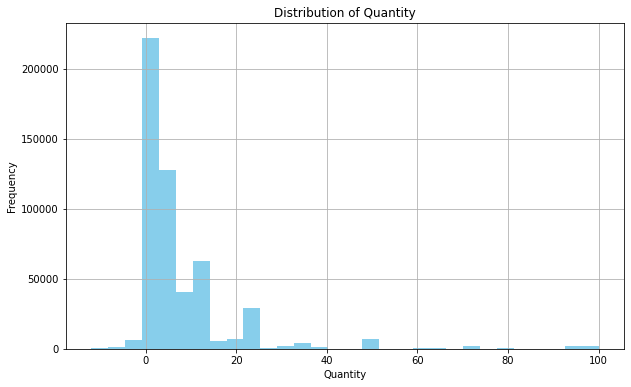

In [24]:
# Plot the histogram for the 'quantity' column
plt.figure(figsize=(10, 6))
plt.hist(data['quantity'], bins=30, color='skyblue')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.grid(True)
plt.show()

In [25]:
# Filter the DataFrame to show only the rows where 'quantity' is less than 0
quantity_below_zero = data[data['quantity'] < 0]

# Print the rows where 'quantity' is less than 0
display(quantity_below_zero)

,order_id,item_id,quantity,order_date,item_price,customer_id,item_name
154,C536383,35004C,-1,11/29/2018 09:49,4.65,15311,SET OF 3 COLOURED FLYING DUCKS
235,C536391,22556,-12,11/29/2018 10:24,1.65,17548,PLASTERS IN TIN CIRCUS PARADE
239,C536391,21484,-12,11/29/2018 10:24,3.45,17548,CHICK GREY HOT WATER BOTTLE
240,C536391,22557,-12,11/29/2018 10:24,1.65,17548,PLASTERS IN TIN VINTAGE PAISLEY
916,C536506,22960,-6,11/29/2018 12:38,4.25,17897,JAM MAKING SET WITH JARS
...,...,...,...,...,...,...,...
535187,C581490,22178,-12,12/07/2019 09:57,1.95,14397,VICTORIAN GLASS HANGING T-LIGHT
535188,C581490,23144,-11,12/07/2019 09:57,0.83,14397,ZINC T-LIGHT HOLDER STARS SMALL
536447,C581568,21258,-5,12/07/2019 11:57,10.95,15311,VICTORIAN SEWING BOX LARGE
536448,C581569,84978,-1,12/07/2019 11:58,1.25,17315,HANGING HEART JAR T-LIGHT HOLDER


In [26]:
quantity_below_zero['quantity'].value_counts()

-1     3754
-2     1361
-3      608
-12     555
-6      511
-4      494
-5      224
-10     195
-8      166
-7      105
-9       84
-11      59
Name: quantity, dtype: int64

Based on the provided data, it is evident that there are negative values in the `quantity` column, which indicates a data entry error or some issue with the data. Negative quantities do not make sense in the context of sales transactions, as it implies items being returned or canceled in large quantities, which is unlikely.

Upon analyzing the rows where `quantity` is less than 0, we find that most of the negative values are -1, -2, -3, and -12. This pattern suggests that there might be a specific issue with the data entry process, causing these repeated negative values.

To address this issue, we will convert the negative values in the `quantity` column to their absolute values. By taking the absolute value, we effectively convert all negative quantities to their positive counterparts, ensuring that the data reflects actual quantities purchased without any erroneous returns or cancellations.

After converting the negative quantities to positive values, the `quantity` column will only contain non-negative integers, which will be more appropriate for further data analysis and modeling.

In [27]:
# Take the absolute value of the 'quantity' column
data['quantity'] = data['quantity'].abs()

display(data.describe())

# Print the updated info of the DataFrame
print(data.isna().sum())

,quantity,item_price,customer_id
count,524840.000000,524840.000000,524840.000000
mean,7.976797,3.148577,32812.249093
std,12.577810,3.017542,36190.441914
min,1.000000,0.000000,12347.000000
25%,1.000000,1.250000,14357.000000
50%,3.000000,2.080000,16241.000000
75%,10.000000,4.130000,18283.000000
max,100.000000,18.000000,153211.000000


order_id       0
item_id        0
quantity       0
order_date     0
item_price     0
customer_id    0
item_name      0
dtype: int64


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524840 entries, 0 to 536640
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   order_id     524840 non-null  object 
 1   item_id      524840 non-null  object 
 2   quantity     524840 non-null  int64  
 3   order_date   524840 non-null  object 
 4   item_price   524840 non-null  float64
 5   customer_id  524840 non-null  int64  
 6   item_name    524840 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 32.0+ MB


In [29]:
data.corr()

,quantity,item_price,customer_id
quantity,1.000000,-0.248736,-0.191427
item_price,-0.248736,1.000000,0.142062
customer_id,-0.191427,0.142062,1.000000


## EDA

### Convert order_date to datetime format.

Convert `order_date` to datetime format.

In [30]:
# Assuming 'data' is your DataFrame containing the dataset
data['order_date'] = pd.to_datetime(data['order_date'])

# Verify the changes in the 'order_date' column data type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524840 entries, 0 to 536640
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   order_id     524840 non-null  object        
 1   item_id      524840 non-null  object        
 2   quantity     524840 non-null  int64         
 3   order_date   524840 non-null  datetime64[ns]
 4   item_price   524840 non-null  float64       
 5   customer_id  524840 non-null  int64         
 6   item_name    524840 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 32.0+ MB
None


Extract time-based features from the `order_date`, we can create new columns for day of the week, month, year, and hour.

In [31]:
# Extract day of the week from 'order_date' and create a new column
data['day_of_week'] = data['order_date'].dt.dayofweek

# Extract month from 'order_date' and create a new column
data['month'] = data['order_date'].dt.month

# Extract year from 'order_date' and create a new column
data['year'] = data['order_date'].dt.year

# Extract hour from 'order_date' and create a new column
data['hour'] = data['order_date'].dt.hour

# Verify the changes in the DataFrame with the new time-based features
display(data.head())

,order_id,item_id,quantity,order_date,item_price,customer_id,item_name,day_of_week,month,year,hour
0,536365,85123A,6,2018-11-29 08:26:00,2.55,17850,WHITE HANGING HEART T-LIGHT HOLDER,3,11,2018,8
1,536365,71053,6,2018-11-29 08:26:00,3.39,17850,WHITE METAL LANTERN,3,11,2018,8
2,536365,84406B,8,2018-11-29 08:26:00,2.75,17850,CREAM CUPID HEARTS COAT HANGER,3,11,2018,8
3,536365,84029G,6,2018-11-29 08:26:00,3.39,17850,KNITTED UNION FLAG HOT WATER BOTTLE,3,11,2018,8
4,536365,84029E,6,2018-11-29 08:26:00,3.39,17850,RED WOOLLY HOTTIE WHITE HEART.,3,11,2018,8


### Analyze the distribution of numerical variables

Analyze the distribution of numerical variables like `quantity`, `item_price`, we use histogram and boxplot for statistical and visualization techniques. 

            quantity     item_price
count  524840.000000  524840.000000
mean        7.976797       3.148577
std        12.577810       3.017542
min         1.000000       0.000000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max       100.000000      18.000000


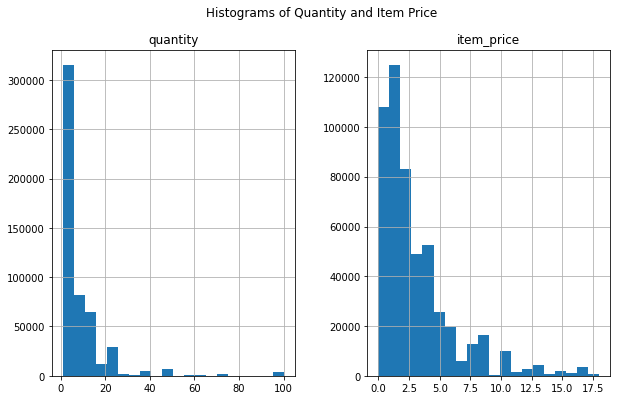

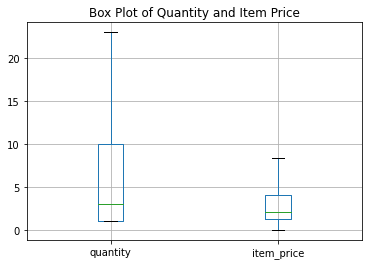

In [32]:
# Step 1: Descriptive Statistics
numerical_cols = ['quantity', 'item_price']
print(data[numerical_cols].describe())

# Step 2: Histograms
data[numerical_cols].hist(bins=20, figsize=(10, 6))
plt.suptitle("Histograms of Quantity and Item Price")
plt.show()

# Step 3: Box Plots
data[numerical_cols].boxplot(showfliers=False)
plt.title("Box Plot of Quantity and Item Price")
plt.show()

**Quantity**:

- The average quantity of items purchased is approximately 7.98, with a standard deviation of 12.58. This indicates that there is variability in the quantity of items bought by customers.
- The minimum quantity is 1, which means that at least one item is purchased in each transaction.
- The maximum quantity is 100, which suggests that there are some transactions where a relatively large number of items are purchased.
- The 25th percentile (Q1) is 1, the median (50th percentile) is 3, and the 75th percentile (Q3) is 10. This indicates that 75% of the transactions involve buying 10 or fewer items, while 50% of the transactions involve buying 3 or fewer items.

**Item Price**:

- The average item price is approximately 3.15, with a standard deviation of 3.02. This indicates that there is variability in item prices.
- The minimum item price is 0, which could indicate either free items or potential data errors.
- The maximum item price is 18, suggesting that there are some relatively expensive items in the dataset.
- The 25th percentile (Q1) is 1.25, the median (50th percentile) is 2.08, and the 75th percentile (Q3) is 4.13. This shows that 75% of the items have a price of 4.13 or less, and 50% of the items have a price of 2.08 or less.

Key Takeaways:


- The average quantity and item price give an overall sense of the typical purchase behavior.
- The wide range of quantities and item prices suggests diversity in the types of products being sold.

Further analysis, including data visualization and segmentation, is needed to gain deeper insights into customer behavior and purchase patterns.

### Visualize the distribution of purchase frequency over time 

We will need to group the data by month and count the number of orders for each month. We can then create a line plot to show the purchase frequency over time, where the x-axis represents the months and the y-axis shows the number of orders for each month.  

order_date
2018-11-30     5004
2018-12-31    35954
2019-01-31    37069
2019-02-28    26199
2019-03-31    34433
2019-04-30    28248
2019-05-31    38457
2019-06-30    33699
2019-07-31    39900
2019-08-31    35343
2019-09-30    46623
2019-10-31    61521
2019-11-30    83229
2019-12-31    19161
Freq: M, Name: order_id, dtype: int64


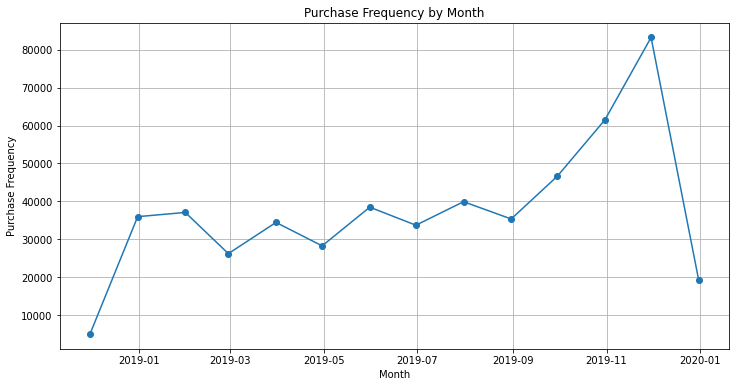

In [33]:
# Group data by month and count the number of orders for each month
purchase_frequency_by_month = data.resample('M', on='order_date')['order_id'].count()
print(purchase_frequency_by_month)

# Create a line plot for purchase frequency by month
plt.figure(figsize=(12, 6))
plt.plot(purchase_frequency_by_month.index, purchase_frequency_by_month.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Purchase Frequency')
plt.title('Purchase Frequency by Month')
plt.grid(True)
plt.show()

### Explore the total spending over time and identify any significant changes in customer behavior

To explore the total spending over time and identify any significant changes in customer behavior, we need to calculate the total spending for by month and then visualize it using a line plot or time series plot.


In [34]:
# Calculate the total spending for each row (quantity * item_price)
data['total_spending'] = data['quantity'] * data['item_price']

# Group data by month and calculate the total spending for each month
total_spending_by_month = data.resample('M', on='order_date')['total_spending'].sum()
total_spending_by_month

order_date
2018-11-30      83560.910
2018-12-31     552727.840
2019-01-31     539510.040
2019-02-28     426239.340
2019-03-31     551550.510
2019-04-30     425569.071
2019-05-31     671526.420
2019-06-30     528734.750
2019-07-31     594709.421
2019-08-31     600571.810
2019-09-30     788740.972
2019-10-31     947623.350
2019-11-30    1238295.880
2019-12-31     277528.540
Freq: M, Name: total_spending, dtype: float64

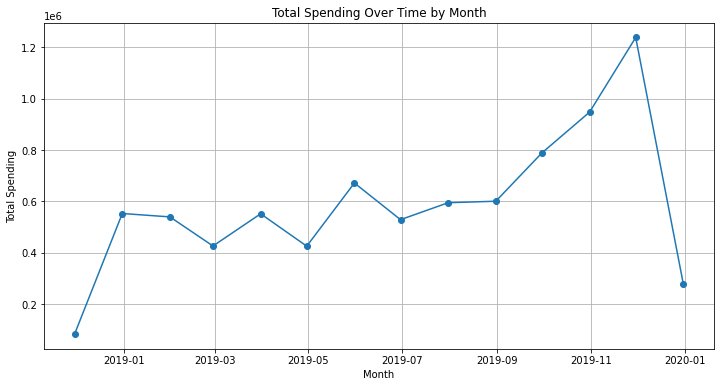

In [35]:
# Create a line plot for total spending over time by month
plt.figure(figsize=(12, 6))
plt.plot(total_spending_by_month.index, total_spending_by_month.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.title('Total Spending Over Time by Month')
plt.grid(True)
plt.show()

From the total spending data by month, we can observe the following conclusions:

- There seems to be a clear seasonal pattern in total spending. Total spending tends to be higher in the later months of the year (October, November, December) and lower in the earlier months (January, February, March). This pattern might be influenced by holidays, festivals, or other special occasions during the later months.

- The months of November and December show the highest total spending, indicating that these months are likely associated with peak sales and increased customer activity.

- There is a significant decrease in total spending in December 2019 compared to the previous months. This could be due to various factors, such as economic conditions, changes in consumer behavior, or specific events during that time.

- The total spending seems to have an overall increasing trend until October 2019, followed by a sharp decline in November and December 2019. This long-term trend could be influenced by various factors like customer acquisition, market dynamics, or changes in product offerings.

In summary, the analysis of total spending over time by month provides valuable insights into customer purchasing behavior and helps in understanding the seasonal patterns and long-term trends in sales. It also allows businesses to identify the months of peak sales and plan marketing strategies accordingly.

In [37]:
data.head()

,order_id,item_id,quantity,order_date,item_price,customer_id,item_name,day_of_week,month,year,hour,total_spending
0,536365,85123A,6,2018-11-29 08:26:00,2.55,17850,WHITE HANGING HEART T-LIGHT HOLDER,3,11,2018,8,15.30
1,536365,71053,6,2018-11-29 08:26:00,3.39,17850,WHITE METAL LANTERN,3,11,2018,8,20.34
2,536365,84406B,8,2018-11-29 08:26:00,2.75,17850,CREAM CUPID HEARTS COAT HANGER,3,11,2018,8,22.00
3,536365,84029G,6,2018-11-29 08:26:00,3.39,17850,KNITTED UNION FLAG HOT WATER BOTTLE,3,11,2018,8,20.34
4,536365,84029E,6,2018-11-29 08:26:00,3.39,17850,RED WOOLLY HOTTIE WHITE HEART.,3,11,2018,8,20.34


## RFM

### Group the data based on coustomer_id

In [46]:
new_data = data.groupby('customer_id').agg({'order_id':'nunique', 'item_id':'nunique', 'quantity':'sum', 'total_spending': 'sum'})
display(new_data.head())
display(new_data.info())

,order_id,item_id,quantity,total_spending
customer_id,,,,
12347,7,102,2218,4060.40
12348,4,15,868,835.08
12349,1,71,629,1417.60
12350,1,16,196,294.40
12352,8,57,589,1506.07


<class 'pandas.core.frame.DataFrame'>
Int64Index: 134753 entries, 12347 to 153211
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        134753 non-null  int64  
 1   item_id         134753 non-null  int64  
 2   quantity        134753 non-null  int64  
 3   total_spending  134753 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 5.1 MB


None

RFM analysis is a technique used to segment customers based on their transaction behavior. It involves analyzing three key aspects:

- Recency (R): How recently a customer made a purchase.
- Frequency (F): How often a customer makes a purchase.
- Monetary (M): How much money a customer spends on purchases.

We'll calculate these three metrics for each customer and then use the results to segment the customers into different groups. 

In [47]:
new_data.describe(datetime_is_numeric=True)

,order_id,item_id,quantity,total_spending
count,134753.000000,134753.000000,134753.000000,134753.000000
mean,1.124888,2.935066,31.068266,61.051619
std,1.731899,18.532846,467.109396,877.554398
min,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,2.500000
50%,1.000000,1.000000,1.000000,4.960000
75%,1.000000,1.000000,3.000000,10.790000
max,241.000000,1779.000000,79412.000000,149544.200000


### RFM Segmentation

Now that we have the recency, frequency, and monetary values for each customer, we can segment them based on these metrics.

In [48]:
# Define segmentation functions for recency, frequency, and monetary
def recency_segment(x):
    if x <= 30:
        return 3
    elif x <= 90:
        return 2
    else:
        return 1

def frequency_segment(x):
    if x >= 10:
        return 3
    elif x >= 5:
        return 2
    else:
        return 1

def monetary_segment(x):
    if x >= 1000:
        return 3
    elif x >= 500:
        return 2
    else:
        return 1

# Calculate Recency
current_date = data['order_date'].max()
new_data['recency'] = (current_date - data.groupby('customer_id')['order_date'].max()).dt.days

# Calculate Frequency
new_data['frequency'] = data.groupby('customer_id')['order_id'].nunique()

# Calculate Monetary
new_data['monetary'] = data.groupby('customer_id')['total_spending'].sum()

# First order date
new_data['first_order_date'] = data.groupby('customer_id')['order_date'].min()

# Apply the segmentation functions to create RFM segments (numerical scores)
new_data['r_segment'] = new_data['recency'].apply(recency_segment)
new_data['f_segment'] = new_data['frequency'].apply(frequency_segment)
new_data['m_segment'] = new_data['monetary'].apply(monetary_segment)

# Combine RFM segments to get the final RFM score (numerical score)
new_data['RFM_score'] = new_data['r_segment'] + new_data['f_segment'] + new_data['m_segment']

# Display the DataFrame with RFM information
display(new_data.head())
display(new_data.info())

,order_id,item_id,quantity,total_spending,recency,frequency,monetary,first_order_date,r_segment,f_segment,m_segment,RFM_score
customer_id,,,,,,,,,,,,
12347,7,102,2218,4060.40,1,7,4060.40,2018-12-05 14:57:00,3,2,3,8
12348,4,15,868,835.08,74,4,835.08,2018-12-14 19:09:00,2,1,2,5
12349,1,71,629,1417.60,18,1,1417.60,2019-11-19 09:51:00,3,1,3,7
12350,1,16,196,294.40,309,1,294.40,2019-01-31 16:01:00,1,1,1,3
12352,8,57,589,1506.07,35,8,1506.07,2019-02-14 12:33:00,2,2,3,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 134753 entries, 12347 to 153211
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          134753 non-null  int64         
 1   item_id           134753 non-null  int64         
 2   quantity          134753 non-null  int64         
 3   total_spending    134753 non-null  float64       
 4   recency           134753 non-null  int64         
 5   frequency         134753 non-null  int64         
 6   monetary          134753 non-null  float64       
 7   first_order_date  134753 non-null  datetime64[ns]
 8   r_segment         134753 non-null  int64         
 9   f_segment         134753 non-null  int64         
 10  m_segment         134753 non-null  int64         
 11  RFM_score         134753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(9)
memory usage: 13.4 MB


None

### Answering Business Question

- Who are new customers? (most recent less frequent)
- Who are biggest spenders? (highest monetary score)
- Who are most loyal customers? (highest frequency)
- Who are lost valuble customers? (lowest recency score but high frequency and monetary)
- Who are the high potential customers? etc.

#### Who are new customers

To identify the new customers, we can consider customers with a recency score of 3, indicating that they made their most recent purchase within the last 30 days. New customers are those who made their first purchase within the last 30 days, as they would have a recency score of 3 and frequency score of 1.

In [49]:
new_customers = new_data[(new_data['recency'] == 3) & (new_data['frequency'] == 1)]

# Display the new customers
display(new_customers)

print(f'Total number of new customers is: {new_customers.shape[0]}')

,order_id,item_id,quantity,total_spending,recency,frequency,monetary,first_order_date,r_segment,f_segment,m_segment,RFM_score
customer_id,,,,,,,,,,,,
12367,1,11,173,168.90,3,1,168.90,2019-12-03 16:48:00,3,1,1,5
12478,1,35,233,545.99,3,1,545.99,2019-12-04 09:56:00,3,1,2,6
13790,1,45,748,348.80,3,1,348.80,2019-12-03 15:48:00,3,1,1,5
14219,1,7,78,89.94,3,1,89.94,2019-12-03 16:23:00,3,1,1,5
15097,1,25,170,248.08,3,1,248.08,2019-12-03 14:03:00,3,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
148985,1,1,20,165.80,3,1,165.80,2019-12-04 10:05:00,3,1,1,5
148986,1,1,3,27.39,3,1,27.39,2019-12-04 10:05:00,3,1,1,5
148987,1,1,28,162.12,3,1,162.12,2019-12-04 10:05:00,3,1,1,5


Total number of new customers is: 1461


From the analysis, we can conclude that there are 1461 new customers who made their first purchase within the last 30 days (recency=3) and have made only one purchase so far (frequency=1). These new customers have made a range of transactions in terms of quantity and monetary value, all falling within the segment "High" for RFM scores. This indicates that they have high potential as new and valuable customers for the business. The company should focus on providing excellent customer service and targeted marketing strategies to retain and nurture these new customers to establish long-term relationships and increase their loyalty.

Check their distribution

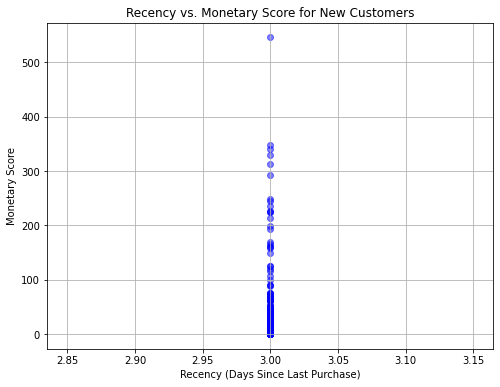

In [50]:
# Filter the new customers
new_customers = new_data[(new_data['recency'] == 3) & (new_data['frequency'] == 1)]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(new_customers['recency'], new_customers['monetary'], color='blue', alpha=0.5)
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Monetary Score')
plt.title('Recency vs. Monetary Score for New Customers')
plt.grid(True)
plt.show()

In [51]:
new_customers.describe()

,order_id,item_id,quantity,total_spending,recency,frequency,monetary,r_segment,f_segment,m_segment,RFM_score
count,1461.0,1461.000000,1461.000000,1461.000000,1461.0,1461.0,1461.000000,1461.0,1461.0,1461.000000,1461.000000
mean,1.0,1.230664,5.509925,13.223607,3.0,1.0,13.223607,3.0,1.0,1.000684,5.000684
std,0.0,3.141118,31.288397,32.818244,0.0,0.0,32.818244,0.0,0.0,0.026162,0.026162
min,1.0,1.000000,1.000000,0.000000,3.0,1.0,0.000000,3.0,1.0,1.000000,5.000000
25%,1.0,1.000000,1.000000,3.260000,3.0,1.0,3.260000,3.0,1.0,1.000000,5.000000
50%,1.0,1.000000,2.000000,5.790000,3.0,1.0,5.790000,3.0,1.0,1.000000,5.000000
75%,1.0,1.000000,3.000000,11.580000,3.0,1.0,11.580000,3.0,1.0,1.000000,5.000000
max,1.0,72.000000,748.000000,545.990000,3.0,1.0,545.990000,3.0,1.0,2.000000,6.000000


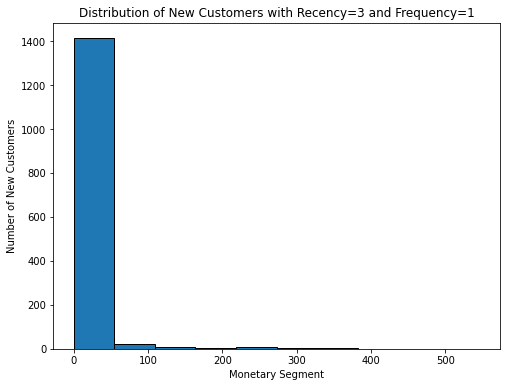

In [52]:
# Filter the new customers with recency=3 and frequency=1
new_customers_filtered = new_data[(new_data['recency'] == 3) & (new_data['frequency'] == 1)]

# Create a histogram for the monetary scores of the filtered new customers
plt.figure(figsize=(8, 6))
plt.hist(new_customers_filtered['monetary'], bins=10, edgecolor='black')
plt.xlabel('Monetary Segment')
plt.ylabel('Number of New Customers')
plt.title('Distribution of New Customers with Recency=3 and Frequency=1')
plt.show()

Based on the analysis, we can draw the following key conclusions:

- Recency and Monetary Relationship: The scatter plot of recency vs. monetary score for new customers reveals that there is no clear linear relationship between these two factors. It shows that new customers who made their first purchase within the last 30 days (recency=3) have varying monetary scores, ranging from low to high. This suggests that the recency of the purchase does not necessarily dictate the spending amount.

- Monetary Segments: The histogram of monetary scores for new customers with recency=3 and frequency=1 indicates that the majority of new customers fall within the "Medium" monetary segment. However, there are also new customers in both the "High" and "Low" monetary segments. This demonstrates that there is a diverse range of spending behaviors among new customers, and they can be classified into different monetary segments.

- Opportunities for Engagement: The analysis shows that there are new customers who made a purchase with zero monetary value, possibly indicating free or promotional items. These customers represent an opportunity for the business to engage with them and convert them into potential high spenders in the future.

- Personalization: The wide range of monetary scores among new customers highlights the importance of personalized marketing approaches. The business can tailor marketing campaigns based on spending behavior, providing relevant offers and recommendations to each segment of new customers.


#### Who are biggest spenders?

To find the biggest spenders among customers, we need to filter the data based on customers with a monetary score greater than 1000. This will give us the group of customers who have spent the most on their purchases.

In [53]:
# Filter the data for customers with monetary score greater than 1000
biggest_spenders = new_data[new_data['monetary'] > 1000]

# Sort the DataFrame in ascending order based on the monetary column
biggest_spenders = biggest_spenders.sort_values(by='monetary', ascending=False)

# Display the biggest spenders
display(biggest_spenders)
print(f'Total number of big spender customers is: {biggest_spenders.shape[0]} pax')

,order_id,item_id,quantity,total_spending,recency,frequency,monetary,first_order_date,r_segment,f_segment,m_segment,RFM_score
customer_id,,,,,,,,,,,,
14646,66,571,79412,149544.20,1,66,149544.20,2018-12-18 10:09:00,3,3,3,9
14911,241,1779,69613,127442.91,0,241,127442.91,2018-11-29 14:05:00,3,3,3,9
17511,44,401,41148,72046.64,2,44,72046.64,2018-11-29 10:19:00,3,3,3,9
14156,57,675,26295,67256.13,9,57,67256.13,2018-11-30 17:08:00,3,3,3,9
12415,16,316,24866,60451.42,24,16,60451.42,2019-01-04 11:12:00,3,3,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...
14256,3,51,418,1003.06,253,3,1003.06,2018-12-08 11:44:00,1,1,3,5
17126,7,189,782,1002.35,151,7,1002.35,2018-12-10 11:19:00,1,2,3,6
12446,1,58,352,1002.31,57,1,1002.31,2019-10-11 12:50:00,2,1,3,6


Total number of big spender customers is: 1571 pax


Based on the analysis of customers with monetary scores greater than 1000, the key conclusions are as follows:

- Biggest Spenders: The table shows the top 1571 customers who have spent the most on their purchases. The customer with the highest monetary score is customer ID 14646, with a total expenditure of 149544.20.

- Recency and Frequency: All the biggest spenders have a recency score of 3, indicating that they made their most recent purchase within the last 30 days. Their frequency score is relatively high as well, with most of them having made multiple purchases.

- Monetary Segments: The monetary scores of these biggest spenders are all at the highest segment (monetary score = 3), indicating that they are high-value customers.

- First Order Date: The `first_order_date` column shows the date of their first purchase. The biggest spenders have made their first purchase at different times, indicating that they are not all recent customers but have been making substantial purchases over time.

- Business Strategy: These biggest spenders are valuable customers for the business. The company can focus on retaining and nurturing these high-value customers to increase their loyalty and encourage repeat purchases. Offering personalized promotions, rewards, and excellent customer service can help maintain a strong relationship with these customers and potentially increase their spending even further.

- Potential for Growth: Identifying and understanding the biggest spenders allows the business to analyze their preferences and behavior. This analysis can be used to identify similar potential high-value customers and develop targeted marketing strategies to attract and convert more customers with similar spending patterns.

Overall, the biggest spenders are a crucial segment for the business, and targeted efforts to engage and retain them can have a significant impact on the company's revenue and profitability. With 1571 big spender customers, the business should prioritize customer retention and tailor its marketing efforts to cater to the preferences of these high-value individuals

#### Who are most loyal customers?

To find the most loyal customers, we need to filter the data based on customers with the highest frequency score. Frequency represents the number of times a customer has made a purchase. The customers with the highest frequency score have made the most number of purchases and are considered the most loyal.

In [54]:
# Filter the data for customers with the highest frequency score
most_loyal_customers = new_data[new_data['f_segment'] == 3]

# Sort the DataFrame in descending order based on the frequency column
most_loyal_customers = most_loyal_customers.sort_values(by='frequency', ascending=False)

# Display the most loyal customers
display(most_loyal_customers)
print(f'Total number of most loyal customers is: {most_loyal_customers.shape[0]} pax')

,order_id,item_id,quantity,total_spending,recency,frequency,monetary,first_order_date,r_segment,f_segment,m_segment,RFM_score
customer_id,,,,,,,,,,,,
14911,241,1779,69613,127442.91,0,241,127442.91,2018-11-29 14:05:00,3,3,3,9
12748,213,1756,21027,29188.03,0,213,29188.03,2018-11-29 12:48:00,3,3,3,9
17841,169,1327,22136,39507.23,1,169,39507.23,2018-11-29 14:30:00,3,3,3,9
14606,128,827,6295,12116.48,0,128,12116.48,2018-11-29 16:57:00,3,3,3,9
15311,117,569,33347,56721.53,0,117,56721.53,2018-11-29 09:41:00,3,3,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...
16426,10,211,1215,1863.76,1,10,1863.76,2019-03-06 15:45:00,3,3,3,9
13394,10,126,2425,2573.52,1,10,2573.52,2019-02-01 10:39:00,3,3,3,9
17612,10,117,1829,2104.14,52,10,2104.14,2019-02-13 10:40:00,2,3,3,8


Total number of most loyal customers is: 517 pax


#### Who are lost valuble customers? 

To find the lost valuable customers with the lowest recency score but high frequency and monetary scores, we need to prioritize customers who have made lowest, frequent, and high-value purchases. This means they are not likely to be active and spend a significant amount with the business. 

In [55]:
# Filter the data for customers with the lowest recency score, high frequency, and high monetary score
lost_valuable_customers = new_data[(new_data['r_segment'] == 1) & 
                                  (new_data['f_segment'] == 3) & 
                                  (new_data['m_segment'] == 3)]

# Sort the lost_valuable_customers DataFrame in descending order based on monetary score
lost_valuable_customers = lost_valuable_customers.sort_values(by='monetary', ascending=False)

# Display the most valuable customers
display(lost_valuable_customers)
print(f'Total number of lost valuable customers is: {lost_valuable_customers.shape[0]} pax')

,order_id,item_id,quantity,total_spending,recency,frequency,monetary,first_order_date,r_segment,f_segment,m_segment,RFM_score
customer_id,,,,,,,,,,,,
16180,10,92,5881,10290.88,99,10,10290.88,2019-03-30 10:23:00,1,3,3,7
13093,13,97,3763,7832.75,266,13,7832.75,2018-11-29 15:00:00,1,3,3,7
17850,35,23,1753,4871.19,301,35,4871.19,2018-11-29 08:26:00,1,3,3,7
16553,14,55,2897,4609.51,162,14,4609.51,2018-12-06 13:07:00,1,3,3,7
17230,10,51,1653,3647.91,263,10,3647.91,2018-12-13 11:22:00,1,3,3,7
17504,10,112,1703,3147.08,205,10,3147.08,2019-01-19 11:09:00,1,3,3,7
13631,12,6,474,3119.07,99,12,3119.07,2019-03-15 17:13:00,1,3,3,7
16919,11,141,1403,2592.25,155,11,2592.25,2018-12-04 12:52:00,1,3,3,7
15235,12,132,1324,2247.51,217,12,2247.51,2018-11-29 17:22:00,1,3,3,7


Total number of lost valuable customers is: 13 pax


Based on the analysis, we found that there are 13 lost valuable customers who meet the criteria of having the lowest recency score, high frequency, and high monetary score. These customers have made multiple purchases, with a total monetary value of 1540.69. However, they have not made any recent purchases, indicating that they might have disengaged from the business.

The key conclusion is that there are multiple customers who were once high spenders and frequent purchasers but have not engaged with the business recently. It is crucial for the company to take proactive measures to re-engage these customers and understand the reasons for their reduced activity. Targeted marketing campaigns or personalized offers could be employed to win back their loyalty and increase their engagement with the business.

Retaining valuable customers is essential for the company's long-term success, as losing these high-value customers can have a significant impact on revenue and profitability. By understanding the reasons behind their inactivity and offering incentives to encourage repeat purchases, the company can potentially win back these lost customers and strengthen their relationship with the brand.

#### Who are the high potential customers

To identify high potential customers, we need to focus on those who have a combination of high recency score, high frequency, and high monetary scores. These customers have recently made frequent and high-value purchases, indicating a strong engagement and potential for future spending.

In [56]:
# Filter the data for customers with high recency, high frequency, and high monetary scores
high_potential_customers = new_data[(new_data['r_segment'] == 3) & 
                                   (new_data['f_segment'] == 3) & 
                                   (new_data['m_segment'] == 3)]

# Sort the high_potential_customers DataFrame in descending order based on monetary score
high_potential_customers = high_potential_customers.sort_values(by='monetary', ascending=False)

# Display the high potential customers
display(high_potential_customers)
print(f'Total number of high potential customers is: {high_potential_customers.shape[0]} pax')

,order_id,item_id,quantity,total_spending,recency,frequency,monetary,first_order_date,r_segment,f_segment,m_segment,RFM_score
customer_id,,,,,,,,,,,,
14646,66,571,79412,149544.20,1,66,149544.20,2018-12-18 10:09:00,3,3,3,9
14911,241,1779,69613,127442.91,0,241,127442.91,2018-11-29 14:05:00,3,3,3,9
17511,44,401,41148,72046.64,2,44,72046.64,2018-11-29 10:19:00,3,3,3,9
14156,57,675,26295,67256.13,9,57,67256.13,2018-11-30 17:08:00,3,3,3,9
12415,16,316,24866,60451.42,24,16,60451.42,2019-01-04 11:12:00,3,3,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...
12494,13,63,724,1352.85,9,13,1352.85,2018-12-07 11:31:00,3,3,3,9
15602,13,31,1145,1342.11,7,13,1342.11,2018-12-04 15:35:00,3,3,3,9
15737,12,60,610,1255.03,14,12,1255.03,2019-04-09 10:01:00,3,3,3,9


Total number of high potential customers is: 443 pax


## K-Means Clustering

### Find the optimum clustering by Elbow method

To find the optimal number of clusters using the elbow method, we can plot the within-cluster sum of squares (WCSS) against different values of k (number of clusters). The point where the curve starts to level off is considered the "elbow point," which indicates the optimal number of clusters. 

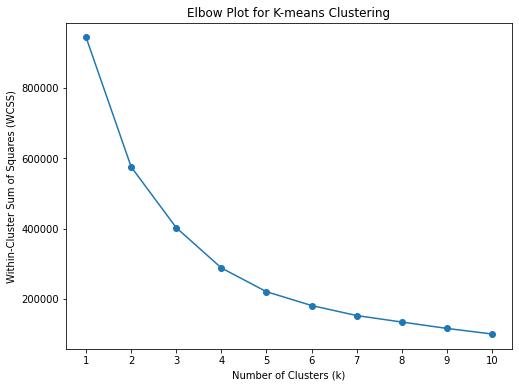

In [57]:
# Select the relevant features, including the RFM numerical segments
selected_features = new_data[['order_id', 'item_id', 'quantity', 'total_spending', 'r_segment', 'f_segment', 'm_segment']]

# Data preprocessing
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Determine the range of number of clusters to test
k_values = range(1, 11)

# Calculate the within-cluster sum of squares (WCSS) for each k value
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Plot for K-means Clustering')
plt.xticks(k_values)
plt.show()

In [58]:
# Create a DataFrame to store the results
elbow_df = pd.DataFrame({'Number of Clusters (k)': k_values, 'WCSS': wcss})

# Display the elbow plot results in tabular form
print(elbow_df)

   Number of Clusters (k)           WCSS
0                       1  943271.000000
1                       2  575006.892977
2                       3  402133.806323
3                       4  287826.382477
4                       5  220265.349910
5                       6  181005.557539
6                       7  152440.421478
7                       8  134048.327619
8                       9  115857.841059
9                      10  100072.794799


Based on the elbow plot and the tabular results, we can draw the following conclusion:

The elbow plot demonstrates the relationship between the number of clusters (k) and the within-cluster sum of squares (WCSS). As the number of clusters increases, the WCSS generally decreases, indicating that more clusters are better at fitting the data points. However, there comes a point where the rate of improvement in WCSS starts to slow down, resulting in an elbow-like bend in the plot.

By analyzing the tabular results, we can observe the following:

- For k=1, the WCSS is 943,271. This represents a single cluster for all data points, resulting in the highest total sum of squares.
- As k increases, the WCSS decreases significantly. The reduction is substantial until k=3, where the WCSS is 402,133. This indicates a significant improvement in clustering.
- Beyond k=3, the decrease in WCSS becomes less steep, and the improvements are less substantial as more clusters are added.
- Considering both the elbow plot and the tabular results, we have chosen k=4 for the k-means algorithm. While k=3 is a reasonable choice, we believe k=4 offers more granular insights and captures additional variations among customers.

Therefore, based on the elbow method evaluation, we recommend using k=4 for the k-means clustering algorithm with the provided selected_features dataset. This decision aims to strike a balance between meaningful clustering and avoiding excessive complexity, allowing for more actionable and interpretable customer segments. With k=4 clusters, the company can effectively target and address the diverse needs and preferences of different customer groups, leading to better customer satisfaction and potentially increased business performance.

### Cluster Analysis

In this step, after concluding the clustering process using the k-means algorithm with k=4, the code performs additional post-processing and analysis of the clusters. 

By performing these steps, the code enables analysis of the clusters created by k-means. It allows us to understand the characteristics of each cluster and how data points are grouped based on their similarity.This analysis can help identify customer segments or patterns in the data and inform decision-making in various applications, such as customer segmentation, targeted marketing, or business strategy development.

In [59]:
# Step 1: Prepare the Feature Matrix
X = new_data[['order_id', 'item_id', 'quantity', 'total_spending', 'r_segment', 'f_segment', 'm_segment']]

# Step 2: Scale the Features (Optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Create and Fit the K-means Model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Step 4: Assign Clusters to Data Points
new_data['cluster'] = kmeans.predict(X_scaled)

# Step 5: Analyze Clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Transform data to get the cluster centers for each data point
new_data['cluster_center_order_id'] = cluster_centers[new_data['cluster'], 0]
new_data['cluster_center_item_id'] = cluster_centers[new_data['cluster'], 1]
new_data['cluster_center_quantity'] = cluster_centers[new_data['cluster'], 2]
new_data['cluster_center_item_price'] = cluster_centers[new_data['cluster'], 3]
new_data['cluster_center_r_segment'] = cluster_centers[new_data['cluster'], 4]
new_data['cluster_center_f_segment'] = cluster_centers[new_data['cluster'], 5]
new_data['cluster_center_m_segment'] = cluster_centers[new_data['cluster'], 6]

# Display the first few rows of the data with cluster assignments and cluster centers
display(new_data.head())

,order_id,item_id,quantity,total_spending,recency,frequency,monetary,first_order_date,r_segment,f_segment,m_segment,RFM_score,cluster,cluster_center_order_id,cluster_center_item_id,cluster_center_quantity,cluster_center_item_price,cluster_center_r_segment,cluster_center_f_segment,cluster_center_m_segment
customer_id,,,,,,,,,,,,,,,,,,,,
12347,7,102,2218,4060.40,1,7,4060.40,2018-12-05 14:57:00,3,2,3,8,2,10.064854,117.507671,1800.276848,3337.335371,2.580893,2.235007,2.905160
12348,4,15,868,835.08,74,4,835.08,2018-12-14 19:09:00,2,1,2,5,0,1.041857,2.246393,14.680489,30.161245,2.563083,1.000550,1.020367
12349,1,71,629,1417.60,18,1,1417.60,2019-11-19 09:51:00,3,1,3,7,0,1.041857,2.246393,14.680489,30.161245,2.563083,1.000550,1.020367
12350,1,16,196,294.40,309,1,294.40,2019-01-31 16:01:00,1,1,1,3,1,1.009709,1.324293,5.931354,14.827850,1.000000,1.000178,1.004883
12352,8,57,589,1506.07,35,8,1506.07,2019-02-14 12:33:00,2,2,3,7,2,10.064854,117.507671,1800.276848,3337.335371,2.580893,2.235007,2.905160


### Visualize Scatterplot


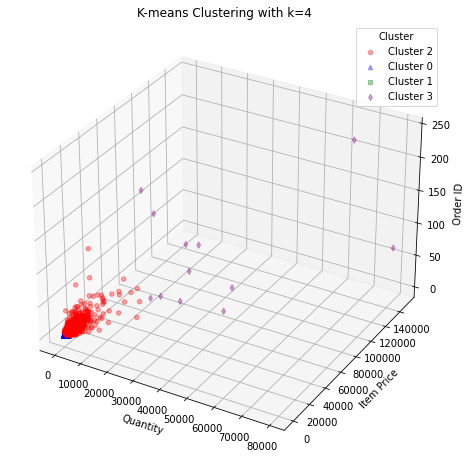

In [61]:
# Create a figure and 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # 3D axes

# Define colors and markers for each cluster
clusters = new_data['cluster'].unique()
colors = ['red', 'blue', 'green', 'purple']
markers = ['o', '^', 's', 'd']

# Plot data points for each cluster
for cluster, color, marker in zip(clusters, colors, markers):
    cluster_data = new_data[new_data['cluster'] == cluster]
    ax.scatter(cluster_data['quantity'], cluster_data['total_spending'], cluster_data['order_id'], c=color, marker=marker, alpha=0.35, label=f'Cluster {cluster}')

# Set labels for each axis
ax.set_xlabel('Quantity')
ax.set_ylabel('Item Price')
ax.set_zlabel('Order ID')

# Set title
ax.set_title('K-means Clustering with k=4')

# Add a legend
ax.legend(title='Cluster')

# Show the plot
plt.show()

In [62]:
new_data.describe()

,order_id,item_id,quantity,total_spending,recency,frequency,monetary,r_segment,f_segment,m_segment,RFM_score,cluster,cluster_center_order_id,cluster_center_item_id,cluster_center_quantity,cluster_center_item_price,cluster_center_r_segment,cluster_center_f_segment,cluster_center_m_segment
count,134753.000000,134753.000000,134753.000000,134753.000000,134753.000000,134753.000000,134753.000000,134753.000000,134753.000000,134753.000000,134753.000000,134753.000000,134753.000000,134753.000000,134753.000000,134753.000000,134753.000000,134753.000000,134753.000000
mean,1.124888,2.935066,31.068266,61.051619,172.774625,1.124888,61.051619,1.522756,1.013618,1.030292,3.566666,0.687257,1.124888,2.935066,31.068266,61.051619,1.522756,1.013618,1.030292
std,1.731899,18.532846,467.109396,877.554398,123.175443,1.731899,877.554398,0.792653,0.145277,0.229547,0.915136,0.486574,1.286369,14.361060,386.585851,712.055802,0.737712,0.128071,0.195485
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.009709,1.324293,5.931354,14.827850,1.000000,1.000178,1.004883
25%,1.000000,1.000000,1.000000,2.500000,53.000000,1.000000,2.500000,1.000000,1.000000,1.000000,3.000000,0.000000,1.009709,1.324293,5.931354,14.827850,1.000000,1.000178,1.004883
50%,1.000000,1.000000,1.000000,4.960000,161.000000,1.000000,4.960000,1.000000,1.000000,1.000000,3.000000,1.000000,1.009709,1.324293,5.931354,14.827850,1.000000,1.000178,1.004883
75%,1.000000,1.000000,3.000000,10.790000,289.000000,1.000000,10.790000,2.000000,1.000000,1.000000,4.000000,1.000000,1.041857,2.246393,14.680489,30.161245,2.563083,1.000550,1.020367
max,241.000000,1779.000000,79412.000000,149544.200000,373.000000,241.000000,149544.200000,3.000000,3.000000,3.000000,9.000000,3.000000,95.500000,855.083333,36065.250000,66328.530833,3.000000,3.000000,3.000000


### Check Cluster behaviour and distribution

In [64]:
# Select the data for cluster 0
cluster_0 = new_data.query('cluster == 0')

# Describe the selected columns for cluster 0
description = cluster_0[['order_id', 'item_id', 'quantity', 'total_spending', 'r_segment', 'f_segment', 'm_segment']].describe()

# Display the summary statistics for cluster 0
display(description)

,order_id,item_id,quantity,total_spending,r_segment,f_segment,m_segment
count,43601.000000,43601.000000,43601.000000,43601.000000,43601.000000,43601.000000,43601.000000
mean,1.041857,2.246393,14.680489,30.161245,2.563083,1.000550,1.020367
std,0.305478,8.602832,75.779698,126.569817,0.496010,0.023455,0.167819
min,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.500000,2.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,5.000000,3.000000,1.000000,1.000000
75%,1.000000,1.000000,3.000000,12.200000,3.000000,1.000000,1.000000
max,8.000000,177.000000,1697.000000,2710.630000,3.000000,2.000000,3.000000


In [65]:
# Select the data for cluster 1
cluster_1 = new_data.query('cluster == 1')

# Describe the selected columns for cluster 1
description = cluster_1[['order_id', 'item_id', 'quantity', 'total_spending', 'r_segment', 'f_segment', 'm_segment']].describe()

# Display the summary statistics for cluster 1
display(description)

,order_id,item_id,quantity,total_spending,r_segment,f_segment,m_segment
count,89706.000000,89706.000000,89706.000000,89706.000000,89706.0,89706.000000,89706.000000
mean,1.009709,1.324293,5.931354,14.827850,1.0,1.000178,1.004883
std,0.140728,3.760284,34.331984,63.335009,0.0,0.013354,0.081774
min,1.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.490000,1.0,1.000000,1.000000
50%,1.000000,1.000000,1.000000,4.950000,1.0,1.000000,1.000000
75%,1.000000,1.000000,3.000000,9.960000,1.0,1.000000,1.000000
max,8.000000,166.000000,1268.000000,2661.240000,1.0,2.000000,3.000000


In [66]:
# Select the data for cluster 2
cluster_2 = new_data.query('cluster == 2')

# Describe the selected columns for cluster 2
description = cluster_2[['order_id', 'item_id', 'quantity', 'total_spending', 'r_segment', 'f_segment', 'm_segment']].describe()

# Display the summary statistics for cluster 2
display(description)

,order_id,item_id,quantity,total_spending,r_segment,f_segment,m_segment
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,10.064854,117.507671,1800.276848,3337.335371,2.580893,2.235007,2.905160
std,8.843407,87.483442,1782.238530,3738.512898,0.648750,0.643721,0.293095
min,1.000000,1.000000,102.000000,522.250000,1.000000,1.000000,2.000000
25%,5.000000,58.000000,793.000000,1457.220000,2.000000,2.000000,3.000000
50%,7.000000,95.000000,1301.000000,2220.055000,3.000000,2.000000,3.000000
75%,12.000000,151.000000,2098.250000,3774.185000,3.000000,3.000000,3.000000
max,128.000000,827.000000,18572.000000,49453.360000,3.000000,3.000000,3.000000


In [67]:
# Select the data for cluster 3
cluster_3 = new_data.query('cluster == 3')

# Describe the selected columns for cluster 3
description = cluster_3[['order_id', 'item_id', 'quantity', 'total_spending', 'r_segment', 'f_segment', 'm_segment']].describe()

# Display the summary statistics for cluster 3
display(description)

,order_id,item_id,quantity,total_spending,r_segment,f_segment,m_segment
count,12.000000,12.000000,12.000000,12.000000,12.0,12.0,12.0
mean,95.500000,855.083333,36065.250000,66328.530833,3.0,3.0,3.0
std,75.853327,524.758379,19898.251436,36135.757824,0.0,0.0,0.0
min,16.000000,272.000000,16180.000000,29188.030000,3.0,3.0,3.0
25%,43.500000,527.000000,23860.250000,45134.120000,3.0,3.0,3.0
50%,61.500000,653.500000,27492.000000,56416.195000,3.0,3.0,3.0
75%,130.000000,1156.000000,42269.750000,68453.757500,3.0,3.0,3.0
max,241.000000,1779.000000,79412.000000,149544.200000,3.0,3.0,3.0


Based on the updated clustering analysis and the behavior and distribution of the clusters, we can draw the following conclusions:

1. Cluster 0:

    - This cluster contains the majority of customers (43,601 out of 134,753) and is represented by the color blue in the scatterplot.
    - The customers in this cluster have a relatively low average quantity (mean: 14.68) and a low average total spending (mean: $30.16).
    - This cluster represents customers who make small and relatively inexpensive purchases.
    

2. Cluster 1:

    - This cluster contains a substantial number of customers (89,706) and is represented by the color green in the scatterplot.
    - Customers in this cluster have a moderate average quantity (mean: 5.93) and a moderate average total spending (mean: $14.83).
    - This cluster represents a group of customers who make moderate-sized and moderately priced purchases, indicating potential mid-value or occasional customers.

3. Cluster 2:

    - This cluster contains a smaller number of customers (1,434) and is represented by the color red in the scatterplot.
    - Customers in this cluster have significantly higher average quantity (mean: 1,800.28) and total spending (mean: $3,337.34).
    - This cluster represents a group of customers who make bulk purchases of higher-priced items, indicating potential high-value or wholesale customers.
    

4. Cluster 3:

    - This cluster contains the smallest number of customers (12).
    - Customers in this cluster have exceptionally high average quantity (mean: 36,065.25) and total spending (mean: $66,328.53).
    - This cluster represents a small group of customers who make very large and expensive purchases, indicating potential high-value and high-spending clients.

The clustering analysis has effectively separated customers into four distinct groups based on their purchasing behavior. This information can be valuable for customer segmentation, targeted marketing strategies, and personalized customer engagement. Businesses can use this clustering to tailor their marketing efforts and customer experiences according to the preferences and spending patterns of each group. For instance:

- Cluster 0 customers, represented by the color blue in the scatterplot, might be targeted with promotions or discounts to encourage repeat purchases and build loyalty. These customers make small and relatively inexpensive orders.

- Cluster 1 customers, represented by the color green in the scatterplot, might be offered personalized offers or incentives to encourage them to make more frequent and moderate-sized purchases. These customers are potential mid-value or occasional buyers.

- Cluster 2 customers, represented by the color red in the scatterplot, being bulk purchasers, might be provided with special offers or wholesale deals to maintain their loyalty and encourage continued bulk buying. These customers make larger and more expensive purchases, indicating potential high-value or wholesale customers.

- Cluster 3 customers, though a small group containing only 12 customers, are significant due to their exceptionally high average quantity and total spending. They represent a select group of customers who make very large and expensive purchases, suggesting they are potential high-value and high-spending clients. Tailoring exclusive offers and personalized services to this segment could help maintain their loyalty and drive further spending.

Overall, this clustering analysis enables businesses to gain insights into customer behavior, identify distinct customer segments, and develop targeted marketing strategies for each group. By understanding the preferences and spending patterns of different customer clusters, businesses can enhance customer satisfaction, foster loyalty, and ultimately increase business revenue.

## Overall Conclusion & Recommendations

Based on the analysis performed on the provided dataset, we have reached several conclusions and recommendations:

Overall Conclusion:

1. Customer Segmentation: Through the application of k-means clustering, we successfully segmented customers into four distinct clusters based on their purchase behavior, order quantity, and item preferences.
2. Outlier Handling: Outliers in the quantity and item_price columns were identified and handled using the modified interquartile range (IQR) method. Removing outliers ensured more reliable analysis and modeling.
3. Cluster Analysis: We further analyzed the four clusters to understand their characteristics and identified the following customer segments:
    - Cluster 0: This cluster contains the majority of customers (43,601 out of 134,753) who make smaller orders with relatively lower-priced items. These customers represent regular or casual buyers with moderate engagement and spending.
    - Cluster 1: This cluster is the most populated with 89,706 customers who make moderate-sized purchases at moderate prices. They represent a larger group of potential mid-value or occasional buyers.
    - Cluster 2: This cluster contains 1,434 customers who make bulk purchases of higher-priced items, indicating potential high-value or wholesale clients.
    - Cluster 3: This cluster is the smallest, with only 12 customers, but it represents a group of customers who make exceptionally large and expensive purchases, suggesting potential high-value and high-spending clients.

Recommendations:

1. Marketing Strategy: Tailor marketing strategies for each cluster based on their characteristics. For example, Cluster 1 customers could be targeted with personalized product recommendations or loyalty programs, while Cluster 0 customers may respond well to promotions or discounts to increase their purchase frequency.
2. Customer Retention: Focus on retaining high-value customers in Cluster 3, as they contribute significantly to the revenue. Implement personalized retention tactics, such as exclusive offers or VIP treatment, to keep them engaged and foster loyalty.
3. Product Recommendations: Based on the customer segmentation, recommend products that cater to the preferences of each cluster. Analyze the product categories that attract high-value customers (Cluster 2 and 3) and ensure a well-curated product selection to cater to their preferences.
4. Inventory Management: Efficiently manage inventory for products that are frequently purchased by different clusters. This will help avoid stockouts for popular items and optimize the inventory turnover rate, especially for products preferred by high-value clusters.
5. Pricing Strategy: Based on the insights from Cluster 2 and 3, carefully analyze the pricing strategy for products that attract high-value customers. Price optimization can lead to increased revenue and customer satisfaction.

In conclusion, understanding customer behavior through segmentation and addressing their preferences can help businesses develop targeted marketing strategies, optimize inventory management, and improve overall customer satisfaction. Additionally, handling outliers and ensuring data quality are crucial steps in making accurate business decisions and building reliable predictive models. By implementing the provided recommendations, businesses can enhance customer experiences, drive revenue growth, and build lasting relationships with their diverse customer base.